In [1]:
# import necessary packeges
%matplotlib inline
from matplotlib import pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import optim
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper

from collections import OrderedDict

Get the device. Device is either cuda:0 or cpu

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
# define a trandform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

# download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data', train=True, download=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# download and load the testing data
testset = datasets.FashionMNIST('F_MNIST_data', train=False, download=True, transform=transform)
test_loader = DataLoader(testset, batch_size=64, shuffle=True)

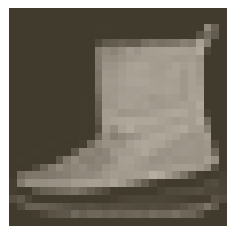

In [4]:
images, labels = next(iter(train_loader))
helper.imshow(images[0,:]);

In [5]:
images.size()

torch.Size([64, 1, 28, 28])

In [6]:
labels.size()

torch.Size([64])

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [7]:
input_layer = 784
hidden_layers = [600, 400, 200]
output_layer = 10

netmodel = nn.Sequential(OrderedDict([
    ('fcl1', nn.Linear(input_layer, hidden_layers[0])),
    ('relu1', nn.ReLU()),
    ('fcl2', nn.Linear(hidden_layers[0], hidden_layers[1])),
    ('relu2', nn.ReLU()),
    ('fcl3', nn.Linear(hidden_layers[1], hidden_layers[2])),
    ('relu3', nn.ReLU()),
    ('output', nn.Linear(hidden_layers[2], output_layer))
]))

netmodel

Sequential(
  (fcl1): Linear(in_features=784, out_features=600, bias=True)
  (relu1): ReLU()
  (fcl2): Linear(in_features=600, out_features=400, bias=True)
  (relu2): ReLU()
  (fcl3): Linear(in_features=400, out_features=200, bias=True)
  (relu3): ReLU()
  (output): Linear(in_features=200, out_features=10, bias=True)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(netmodel.parameters(), lr=0.001)
#optimizer = optim.SGD(netmodel.parameters(), lr=0.003)

In [9]:
epochs = 4
steps = 0
running_loss = 0
print_every = 40

netmodel.to(device)

for e in range(epochs):
    running_loss = 0
    for image, label in iter(train_loader):
        steps += 1
        
        # flatten the imiga into a 784 element vector
        image.resize_(image.size()[0], 784)
        
        image, label = image.to(device), label.to(device)
        
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        
        output = netmodel.forward(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/4...  Loss: 1.0979
Epoch: 1/4...  Loss: 0.6477
Epoch: 1/4...  Loss: 0.6196
Epoch: 1/4...  Loss: 0.5667
Epoch: 1/4...  Loss: 0.5452
Epoch: 1/4...  Loss: 0.5329
Epoch: 1/4...  Loss: 0.4904
Epoch: 1/4...  Loss: 0.4758
Epoch: 1/4...  Loss: 0.4840
Epoch: 1/4...  Loss: 0.4535
Epoch: 1/4...  Loss: 0.4625
Epoch: 1/4...  Loss: 0.4546
Epoch: 1/4...  Loss: 0.4460
Epoch: 1/4...  Loss: 0.4343
Epoch: 1/4...  Loss: 0.4274
Epoch: 1/4...  Loss: 0.4320
Epoch: 1/4...  Loss: 0.4055
Epoch: 1/4...  Loss: 0.4227
Epoch: 1/4...  Loss: 0.4304
Epoch: 1/4...  Loss: 0.4052
Epoch: 1/4...  Loss: 0.4437
Epoch: 1/4...  Loss: 0.4279
Epoch: 1/4...  Loss: 0.4157
Epoch: 2/4...  Loss: 0.1964
Epoch: 2/4...  Loss: 0.3987
Epoch: 2/4...  Loss: 0.3967
Epoch: 2/4...  Loss: 0.3976
Epoch: 2/4...  Loss: 0.3985
Epoch: 2/4...  Loss: 0.3815
Epoch: 2/4...  Loss: 0.3637
Epoch: 2/4...  Loss: 0.3799
Epoch: 2/4...  Loss: 0.3851
Epoch: 2/4...  Loss: 0.4002
Epoch: 2/4...  Loss: 0.3914
Epoch: 2/4...  Loss: 0.3812
Epoch: 2/4...  Loss:

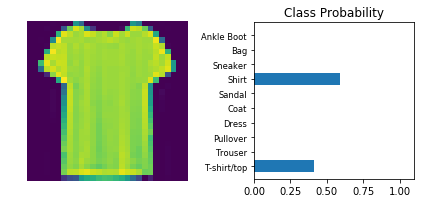

In [10]:
# Test out your network!

dataiter = iter(test_loader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilities (softmax) for img
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = netmodel.forward(img)
    
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')